In [1]:
import pandas as pd
import numpy as np
from datascience import *
from datascience import Table
import matplotlib
%matplotlib inline
import scipy as sp


import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

# Air Quality

## The Data Science Life Cycle - Table of Contents

<a href='#section 0'>Background Knowledge</a>

<a href='#subsection 1a'>Formulating a question or problem</a> 

<a href='#subsection 1b'>Acquiring and preparing data</a>

<a href='#subsection 1c'>Conducting exploratory data analysis</a>

<a href='#subsection 1d'>Using prediction and inference to draw conclusions</a>
<br><br>

## Background<a id='section 0'></a>

In 2004, California introduced the Environmental Justice Action Plan, to study the impact of multiple pollution sources on California communities. 

While California has some of the strictest regulatory controls in the country, many communities in California struggle with a disproportionate share of environmental pollution. 
Some parts of the state are burdened by old industrial and agricultural practices, while others are close to
trade corridors and suffer from high levels of air pollution. 
 
The California Environmental Protection Agency (CalEPA) and the California Office of Health Hazard Assessment (OEHHA)
and the public developed the CalEnviroScreen project to help assess the impact of pollution on California Communities. 


## Formulating a question or problem <a id='subsection 1a'></a>

It is important to ask questions that will be informative and that will avoid misleading results. There are many different questions we could ask about air pollution and health, for example, many researchers use data to examine the associations between pollution and health outcomes, such as asthma and cardiovascular disease.

<div class="alert alert-info">
<b>Question:</b> Take some time to formulate questions you have about pollution and the data you would need to answer the questions. In addition, add the link of an article you found interesting with a description an why it interested you. 
   </div>

**Your questions:** *here*

**Data you would need:** *here*


**Article:** *link*

## Acquiring and preparing data <a id='subsection 1b'></a>

You will be looking at data from the website of the Office of Environmental Health Hazard Assessment. The Californai Environmental Screening project, CalEnviroScreen, provides data on air, water, and land pollution, e.g., ozone levels, airborne particulate matter, pesticides, traffic congestion. CalEnviroScreen, CES for short, has combined this information into a pollution  score. You can find raw data [here](https://oehha.ca.gov/calenviroscreen).

The data provided here includes environmental and population information across different census tracts in California. Census tracts from the US Census Bureau (2010 census) represent small communities. The typical size of a census tract is around 4,000 people. 

In [2]:
ces_data = Table.read_table("data/ces_data_v2.csv")

Here are some of the important fields in the dataset that you will focus on:

|Column Name   | Description |
|:---|:---|
|Total.Population | Population |
|California.County | County name |
|Hispanic....| Percent of population that is Hispanic |
|White.... | Precent of population that is non-Hispanic White |
|African.American.... | Precent of population that is African American |
|Ozone| Average daily maximum ozone concnetration (ppm) from May to October |
|PM2.5 | Average concentration of fine particulate matter (micro-gram per meter cubed) |
|Pesticides| Total pounds of active pesticide ingredients per square mile |
|Traffic | Traffic density: vehicle-kilometers per hour divided by total road length (kilometers) within 150 meters of the census tract boundary |
|Pollution.Burden | Pollution Burden scores for each census tract derived from exposures indicators (ozone and PM2.5 concentrations, diesel PM emissions, drinking water contaminants, pesticide use, toxic releases from facilities, and traffic density) and environmental effects indicators (cleanup sites, impaired water bodies, groundwater threats, hazardous waste facilities and generators, and solid waste sites and facilities) |
|Asthma | Emergency department visits for asthma per 10,000 people |
|Low.Birth.Weight | Percent of babies born weighing under 5.5 pounds |
|Poverty | Percent of the population living below two times the federal poverty level |
|Unemployment | Percent of the population over 16 that is unemployed and eligible for the labor force |

Let's take a look at the data.

In [3]:
ces_data.show(12)

Census.Tract,CES.3.0.Score,Total.Population,California.County,Hispanic....,White....,African.American....,Native.American....,Asian.American....,Other....,ZIP,Longitude,Latitude,Ozone,PM2.5,Diesel.PM,Drinking.Water,Pesticides,Tox..Release,Traffic,Cleanup.Sites,Groundwater.Threats,Haz..Waste,Imp..Water.Bodies,Solid.Waste,Pollution.Burden,Asthma,Low.Birth.Weight,Poverty,Unemployment
6019001100,94.09,3174,Fresno,65.3,4.2,24.6,0.5,3.5,1.8,93706,-119.782,36.7097,0.065,15.4,48.524,681.2,2.75,18552,909.14,80.5,45.75,0.795,0,21.75,79.96,131.64,7.44,76.3,17.6
6071001600,90.68,6133,San Bernardino,91.1,5.8,0.7,0.3,1.4,0.7,91761,-117.618,34.0578,0.062,13.31,38.556,904.66,1.37,7494.24,782.26,66.2,36,1.25,5,12,81.19,60.66,7.04,72.5,12.3
6019000200,85.97,3167,Fresno,63.6,5.3,18.9,0.6,9.8,1.8,93706,-119.806,36.7355,0.062,15.4,47.445,681.2,3.03,12454.9,576.52,22,30.25,0.2,0,2.5,71.16,142.12,10.16,86.8,16.1
6077000801,82.49,6692,San Joaquin,57.4,6,12.5,0.3,20.9,2.8,95203,-121.315,37.9405,0.046,12.54,24.117,278.76,12.93,2387.78,1305.01,50.1,132.1,0.795,19,27,74.48,142.17,6.23,61.3,19.6
6019001500,82.03,2206,Fresno,71.8,21.4,1.2,0.5,4.5,0.6,93725,-119.718,36.6816,0.065,15.4,18.846,1000.24,3518.41,21790.7,435.16,60,54.2,13.1,0,50.8,80.2,90.48,4.5,66.4,18.6
6037204920,80.73,2598,Los Angeles,98.1,1.2,0.1,0.1,0.2,0.3,90023,-118.197,34.0175,0.046,12.89,56.52,714.48,0,39040.2,2943.44,36.7,25,4.93,7,3.85,76.73,68.74,7.35,66.4,11.6
6077000300,80.18,2396,San Joaquin,51.8,16.4,16.4,1.3,9.9,4.1,95203,-121.302,37.9524,0.046,13.44,21.76,278.76,172.49,707.536,885.52,89.7,149.05,0.135,14,2.3,68.27,169.56,8.36,76.2,14.4
6019001000,80.13,4106,Fresno,52.7,2.7,28.7,0.4,14.3,1.2,93706,-119.804,36.6978,0.065,15.4,20.848,788.02,1435.93,6996.96,243.54,15.45,20,0,0,10,66.88,142.28,7.83,74.5,20
6037206050,79.03,2146,Los Angeles,79.3,8.9,4.1,0.1,7.2,0.5,90023,-118.224,34.0299,0.046,12.89,53.958,664.07,0,10378.2,2810.82,36.05,16.25,10.025,7,22.1,77.09,58.03,6.71,75.7,28.5
6019000400,78.53,6343,Fresno,78,9.1,5.8,0.8,5.3,0.9,93721,-119.776,36.7277,0.065,15.4,54.356,681.2,114.96,125384,815.36,15.95,13.5,0.755,0,0.5,73.89,107.8,4.79,83.4,23.5


<div class="alert alert-info">
<b>Question:</b> We want to learn more about the dataset. First, how many total rows are in this table? 
</div>

In [ ]:
ces_data...

In [5]:
#KEY
ces_data.num_rows

8035

**Your answer here:**

<div class="alert alert-info">
<b>Question:</b> What does each row represent?
   </div>  

**Your answer here:**

<div class="alert alert-info">
<b>Question:</b> This table has a column called Pollution Burden, which combines all of the pollution indicators into one score. For our initial analysis, we will keep this column and a few other pollution measures. We will ignore the rest. Which ones would you want to keep for your analysis?  
</div>

**Your answer here:**

Part of **cleaning data** includes **renaming columns**, **reducing the table size to include only the columns of interest**, and **removing missing values**.  

For our purposes, we will not be using the columns: `CES.3.0.Score`, `Country_Region`, `Latitude`, and `Longitude`. Next week, we will make maps, and then the columns `Latitude` and `Longitude` will be useful, but until then, drop them. 

Keep the column `Census.Tract` because it uniquely identifies the census tract.  Also keep `Pollution.Burden`, race columns, health indicators, and a few pollution indicators that you identified earlier.  

<div class="alert alert-info">
<b>Question:</b> Fill the array "cols_to_drop" with the name of the columns we seek to remove from our dataset.
   </div> 

In [ ]:
cols_to_drop = ["...", "...", "...", "...", "...", "...", "...", "...", "...", "...", "...", "..."]

ces_data = ces_data.drop(cols_to_drop)

ces_data.show(10)

In [6]:
#KEY
cols_to_drop = ["CES.3.0.Score", "ZIP", "Longitude", "Latitude", "Diesel.PM", "Drinking.Water", "Pesticides", 
                "Tox..Release", "Traffic", "Cleanup.Sites", "Groundwater.Threats", "Haz..Waste", 
                "Imp..Water.Bodies", "Solid.Waste"]

ces_data = ces_data.drop(cols_to_drop)

ces_data.show(10)

Census.Tract,Total.Population,California.County,Hispanic....,White....,African.American....,Native.American....,Asian.American....,Other....,Ozone,PM2.5,Pollution.Burden,Asthma,Low.Birth.Weight,Poverty,Unemployment
6019001100,3174,Fresno,65.3,4.2,24.6,0.5,3.5,1.8,0.065,15.4,79.96,131.64,7.44,76.3,17.6
6071001600,6133,San Bernardino,91.1,5.8,0.7,0.3,1.4,0.7,0.062,13.31,81.19,60.66,7.04,72.5,12.3
6019000200,3167,Fresno,63.6,5.3,18.9,0.6,9.8,1.8,0.062,15.4,71.16,142.12,10.16,86.8,16.1
6077000801,6692,San Joaquin,57.4,6,12.5,0.3,20.9,2.8,0.046,12.54,74.48,142.17,6.23,61.3,19.6
6019001500,2206,Fresno,71.8,21.4,1.2,0.5,4.5,0.6,0.065,15.4,80.2,90.48,4.5,66.4,18.6
6037204920,2598,Los Angeles,98.1,1.2,0.1,0.1,0.2,0.3,0.046,12.89,76.73,68.74,7.35,66.4,11.6
6077000300,2396,San Joaquin,51.8,16.4,16.4,1.3,9.9,4.1,0.046,13.44,68.27,169.56,8.36,76.2,14.4
6019001000,4106,Fresno,52.7,2.7,28.7,0.4,14.3,1.2,0.065,15.4,66.88,142.28,7.83,74.5,20
6037206050,2146,Los Angeles,79.3,8.9,4.1,0.1,7.2,0.5,0.046,12.89,77.09,58.03,6.71,75.7,28.5
6019000400,6343,Fresno,78,9.1,5.8,0.8,5.3,0.9,0.065,15.4,73.89,107.8,4.79,83.4,23.5


Let's give some of the remaining columns simpler, more meaningful names.

In [7]:
old_names = ['Census.Tract', 'Total.Population', 'California.County', 'Hispanic....', "White....", 
            'African.American....', 'Native.American....', "Asian.American....", 'Other....', 'Pollution.Burden',
            'Low.Birth.Weight']
new_names = ['Tract', 'Population', 'County', 'Hispanic', "White", 'Black', 'Native', "Asian", 'Other', 'Pollution',
            'Low_Birthweight']

In [8]:
ces_data = ces_data.relabel(old_names, new_names)

In [11]:
ces_data.show(10)

Tract,Population,County,Hispanic,White,Black,Native,Asian,Other,Ozone,PM2.5,Pollution,Asthma,Low_Birthweight,Poverty,Unemployment
6019001100,3174,Fresno,65.3,4.2,24.6,0.5,3.5,1.8,0.065,15.4,79.96,131.64,7.44,76.3,17.6
6071001600,6133,San Bernardino,91.1,5.8,0.7,0.3,1.4,0.7,0.062,13.31,81.19,60.66,7.04,72.5,12.3
6019000200,3167,Fresno,63.6,5.3,18.9,0.6,9.8,1.8,0.062,15.4,71.16,142.12,10.16,86.8,16.1
6077000801,6692,San Joaquin,57.4,6,12.5,0.3,20.9,2.8,0.046,12.54,74.48,142.17,6.23,61.3,19.6
6019001500,2206,Fresno,71.8,21.4,1.2,0.5,4.5,0.6,0.065,15.4,80.2,90.48,4.5,66.4,18.6
6037204920,2598,Los Angeles,98.1,1.2,0.1,0.1,0.2,0.3,0.046,12.89,76.73,68.74,7.35,66.4,11.6
6077000300,2396,San Joaquin,51.8,16.4,16.4,1.3,9.9,4.1,0.046,13.44,68.27,169.56,8.36,76.2,14.4
6019001000,4106,Fresno,52.7,2.7,28.7,0.4,14.3,1.2,0.065,15.4,66.88,142.28,7.83,74.5,20
6037206050,2146,Los Angeles,79.3,8.9,4.1,0.1,7.2,0.5,0.046,12.89,77.09,58.03,6.71,75.7,28.5
6019000400,6343,Fresno,78,9.1,5.8,0.8,5.3,0.9,0.065,15.4,73.89,107.8,4.79,83.4,23.5


<div class="alert alert-info"> 
<b>Question:</b> It's important to evalute our data source. What do you know about the CalEnviroScreen project? What motivations do they have for collecting this data? 
   </div>

**Your answer here:**

## Conducting exploratory data analysis <a id='subsection 1c'></a>

Often when we begin our explorations, we first examine the distribution of key columns.

We are interested in studying the impact of pollution on different communities in California. We might begin looking at the distribution of the pollution burden across all census tracts. 

Visualizations help us to see the distributions of values, and in particular histograms and bar charts are particulalry helpful. We use bar charts to examine the distribution of qualitative characteristics and histograms for 
numeric data. 

Also, the method of comparison is a common and powerful tool to help us understand the data. For example, we might want to compare the distribution of the pollution burden by race. 

Additionally, we might want to explore the relationship between the pollution burden and health indicators. How does an increase in pollution relate to rate of low birth weights or the incidence of asthma?  

###  Distributions 

What does the distribution of pollution burden look like?

ADD SOMETHING ABOUT WHY SYMMETRY IS GOOD.

<div class="alert alert-info">
<b>Question:</b> Create a histogram to visualize the pollution burden. Do the same for one of the health indicators, such as low birth weight or asthma.
   </div>

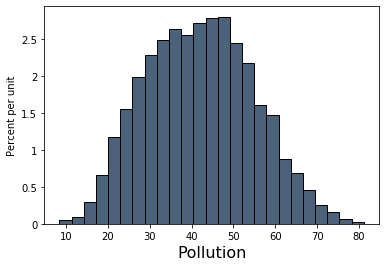

In [12]:
ces_data.select('Pollution').hist(bins=25)

In [ ]:
ces_data.hist('...')

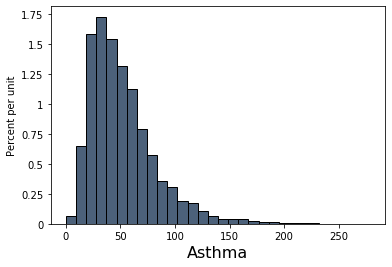

In [13]:
#KEY
ces_data.hist('Asthma', bins=30)

<div class="alert alert-info">
<b>Question:</b> What is the shape of these histograms? Are they symmetric or skewed? Do they have one mode or two? 
    Describe each one in turn.
   </div>

**Your answer here**

### Relationships

Our instinct tells us that higher levels of pollution are most likely associated with health problems, but we cannot see this connection from histograms. We need to see how these two vary together.

<div class="alert alert-info">
<b>Question:</b> How does the prevalence of low birthweight babies vary with pollution levels?  Make a scatter plot with pollution on the x-axis. Describe the pattern that you see.
   </div>

In [ ]:
ces_data.scatter('...', '...', alpha = .16, s = 10)

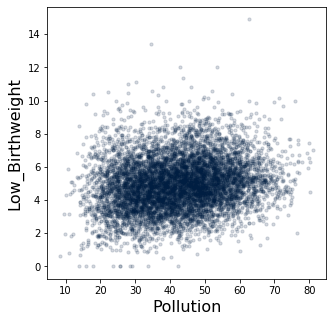

In [14]:
#KEY
ces_data.scatter('Pollution', 'Low_Birthweight', alpha = .16, s = 10)

**Your answer here.**

<div class="alert alert-info">
<b>Question:</b> How do the pollution levels vary with race?  Make a scatter plot with pollution on the y-axis. Describe the pattern that you see.
   </div>

In [ ]:
ces_data.scatter("...", "...", alpha = .16, s = 10)

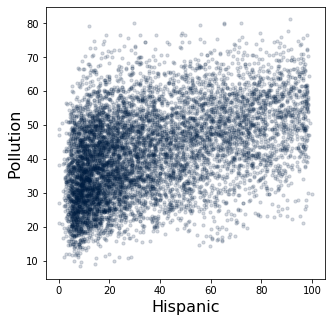

In [15]:
#KEY

ces_data.scatter("Hispanic", "Pollution", alpha = .16, s = 10)

**Your Answer Here**

<div class="alert alert-info">
    <b>Question:</b> How does the prevalence of low birthweight babies vary with race?  Make a scatter plot with race on the x-axis. Describe the pattern that you see.
   </div>

In [ ]:
ces_data.scatter("...", "...", alpha = .16, s = 10)

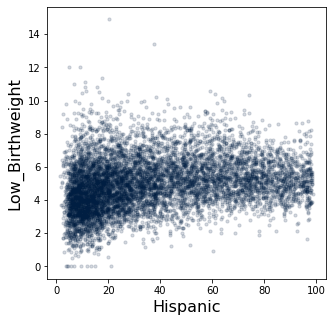

In [16]:
#KEY

ces_data.scatter("Hispanic", "Low_Birthweight", alpha = .16, s = 10)

### Trends

When we have a lot of data, it can be difficult to spot trends. In the scatter plots that you just made, we compensated for the large amount of data by making the plotting symbols smaller than usual (`s=10`) so that the symbols do not overlap as much. We also made the symbols slightly transparent (`alpha=.16`) so that when they do over plot they build in opaqueness to help us distinguish between more and less dense areas.

Another approach to help reveal trends is to connect local averages. For example, for a particular percent Hispanic, we can plot the average pollution level. When we do this for many percentages then we can connect these averages to see the trend, i.e., how pollution levels vary on average with race. 

The code below adds a trend curve to the scatter plot.

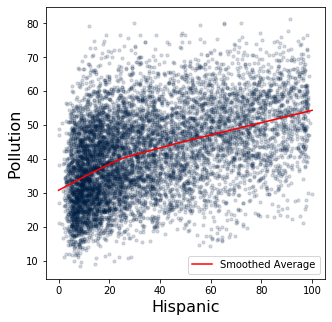

In [17]:
ces_data.scatter("Hispanic", "Pollution", alpha = .16, s = 10)

ysmooth = lowess(ces_data['Pollution'], ces_data['Hispanic'], return_sorted=False)
sns.lineplot(ces_data['Hispanic'], ysmooth, label="Smoothed Average", color='red')

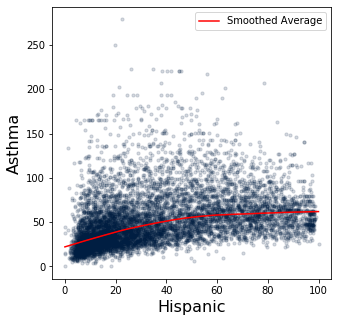

In [18]:
ces_data.scatter("Hispanic", "Asthma", alpha = .16, s = 10)

ysmooth = lowess(ces_data['Asthma'], ces_data['Hispanic'], return_sorted=False)
sns.lineplot(ces_data['Hispanic'], ysmooth, label="Smoothed Average", color='red')

<div class="alert alert-info">
    <b>Question:</b>Revisit the question: How do pollution levels vary with race? Describe the trend that you see.
   </div>

**Your answer here.**

# Using prediction and inference to draw conclusions <a id='subsection 1a'></a>

You have examined the relationship between:

+ pollution levels and the prevalence of low birthweight babies 
+ the percent Hispanic and pollution levels
+ prevalence of low birthweight babies and percent Hispanic 

With three variables, we can examine 3 scatter plots of the 3 pairs of variables. 
Ideally, we would like to visualize a 3-dimensional plot of all three variables at once.

### Comparisons

The scatter plots with race on the x-axis showed a trend with a steep increase in pollution levels, up to about 10%, followed by a flattening out. We can use this insight to create a new variable that indicates whether the percent Hispanic is below or above 10%. Then, we can use this new variable to compare these two groups (above and below 10%). For instance, we can compare the distribution of pollution level for these two groups. We can even examine trends for these two groups. 

<div class="alert alert-info">
    <b>Question:</b> Overlay two histograms of pollution, one for census tracts where the percentage of Hispanics is below 10 and the other where the percentage exceeds 10.
   </div>

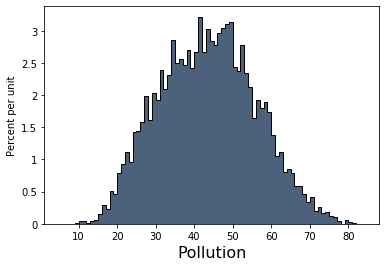

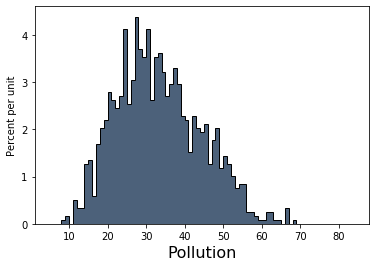

In [19]:
#KEY
ces_data.where('Hispanic', are.above(9.99)).select('Pollution').hist(bins = range(5, 85))
ces_data.where('Hispanic', are.below(10)).select('Pollution').hist(bins = range(5, 85))

<div class="alert alert-info">
    <b>Question:</b> Overlay two trends on a scatter plot of pollution and low birthweight, one for census tracts where the percentage of Hispanics is below 10 and the other where the percentage exceeds 10.
   </div>

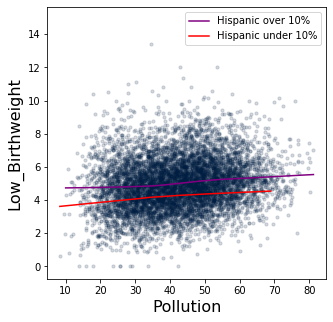

In [21]:
ces_data.scatter('Pollution', 'Low_Birthweight', alpha=.16, s=10)

ces_high = ces_data.where('Hispanic', are.above(9.99))
ysmooth_high = lowess(ces_high['Low_Birthweight'], ces_high['Pollution'], return_sorted=False)
sns.lineplot(ces_high['Pollution'], ysmooth_high, label="Hispanic over 10%", color='purple')

ces_low = ces_data.where('Hispanic', are.below(10))
ysmooth_low = lowess(ces_low['Low_Birthweight'], ces_low['Pollution'], return_sorted=False)
sns.lineplot(ces_low['Pollution'], ysmooth_low, label="Hispanic under 10%", color='red')

<div class="alert alert-info">
    <b>Question:</b> After examining these visualizations, tell us something interesting about these data. Tell us what you learned about the relationships between these three variables. 
Why might this be the case? How do you think can explain what you see?
   </div>

**Your answer here**